#About Dataset
**Context**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.                      
                              
**Problem Statement**

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
marketing_campaign_data = pd.read_csv('/content/marketing_campaign.csv', sep= '\t')
marketing_campaign_data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [12]:
marketing_campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [14]:
marketing_campaign_data.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [15]:
marketing_campaign_data.duplicated().sum()

0

In [16]:
marketing_campaign_data.fillna(marketing_campaign_data['Income'].median(), inplace=True)

In [17]:
marketing_campaign_data['Income'].isna().sum()

0

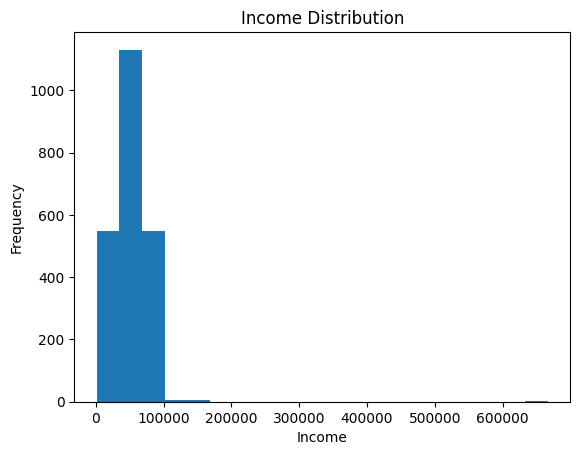

In [19]:
# Histogram for income distribution
plt.hist(marketing_campaign_data['Income'], bins=20)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()



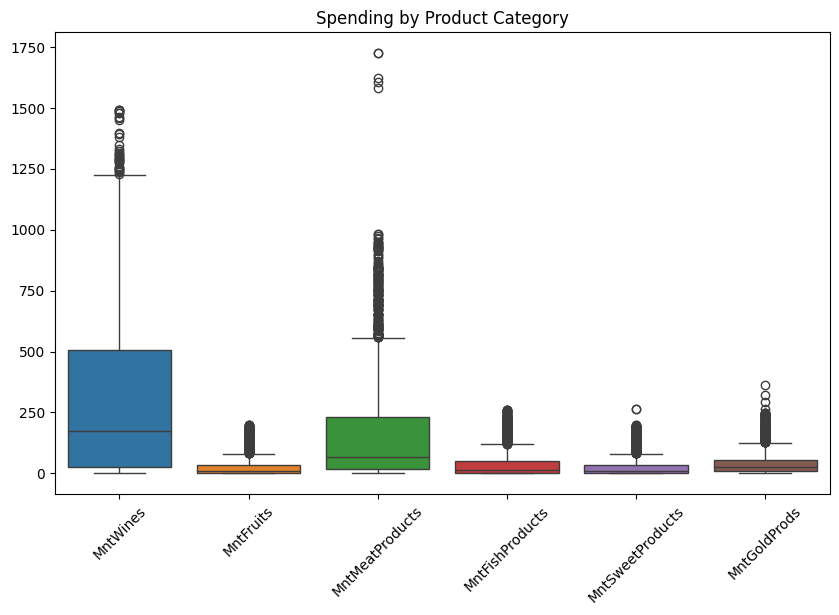

In [21]:
# Box plot for spending on different product categories
plt.figure(figsize=(10, 6))
sns.boxplot(data = marketing_campaign_data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])
plt.title("Spending by Product Category")
plt.xticks(rotation=45)
plt.show()

In [32]:
# Calculate total spending for each customer
marketing_campaign_data['Total_Spending'] = marketing_campaign_data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Define segments
# High Spenders
high_spenders = marketing_campaign_data[marketing_campaign_data['Total_Spending'] > marketing_campaign_data['Total_Spending'].quantile(0.75)]

# Frequent Buyers
frequent_buyers = marketing_campaign_data[marketing_campaign_data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1) > marketing_campaign_data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1).quantile(0.75)]

# Loyal Customers
loyal_customers = marketing_campaign_data[(marketing_campaign_data['Recency'] <= 30) & (marketing_campaign_data['NumWebVisitsMonth'] > 4)]

# Discount-Driven Buyers
discount_driven = marketing_campaign_data[marketing_campaign_data['NumDealsPurchases'] > marketing_campaign_data['NumDealsPurchases'].quantile(0.75)]

In [33]:
marketing_campaign_data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spending
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,422
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,0,0,0,0,0,0,3,11,0,716
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,0,0,0,0,0,0,3,11,0,590
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,0,0,0,0,0,0,3,11,0,169
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,0,0,0,0,0,0,3,11,1,46
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,1,0,0,0,0,0,3,11,0,49


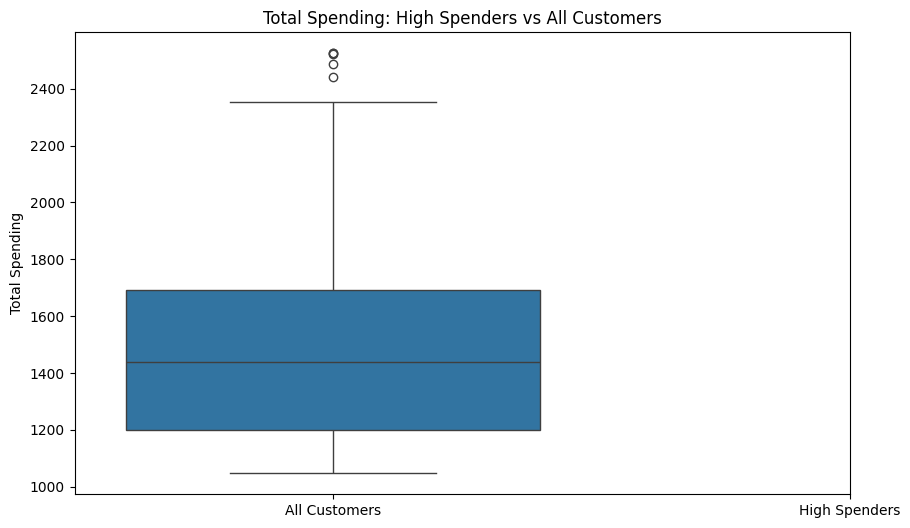

In [35]:
# Box Plot: Total Spending for High Spenders vs All Customers
plt.figure(figsize=(10, 6))
sns.boxplot(data=[marketing_campaign_data['Total_Spending'], high_spenders['Total_Spending']])
plt.xticks([0, 1], ['All Customers', 'High Spenders'])
plt.title("Total Spending: High Spenders vs All Customers")
plt.ylabel("Total Spending")
plt.show()


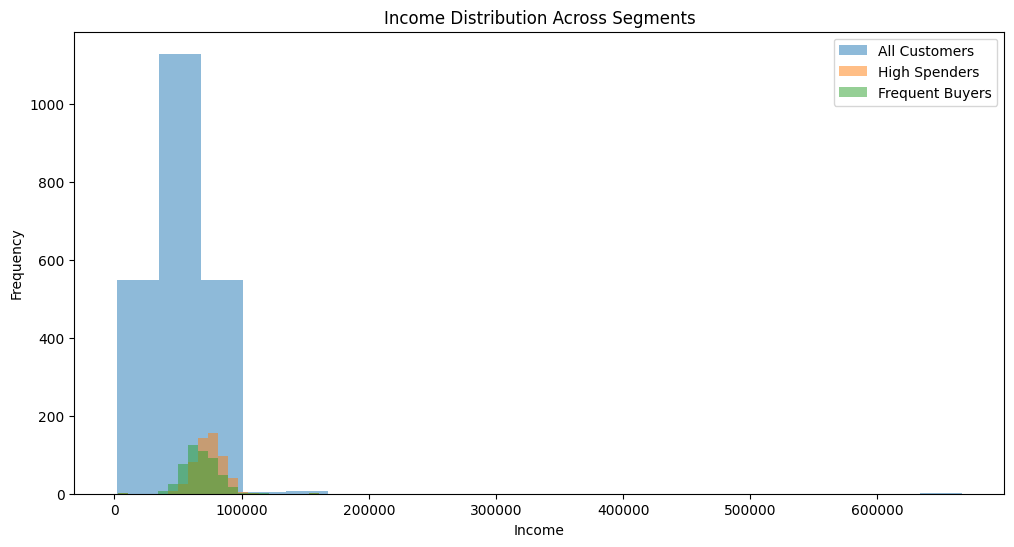

In [36]:
# Histogram: Income Distribution for Each Segment
plt.figure(figsize=(12, 6))
plt.hist(marketing_campaign_data['Income'], bins=20, alpha=0.5, label='All Customers')
plt.hist(high_spenders['Income'], bins=20, alpha=0.5, label='High Spenders')
plt.hist(frequent_buyers['Income'], bins=20, alpha=0.5, label='Frequent Buyers')
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Income Distribution Across Segments")
plt.legend()
plt.show()

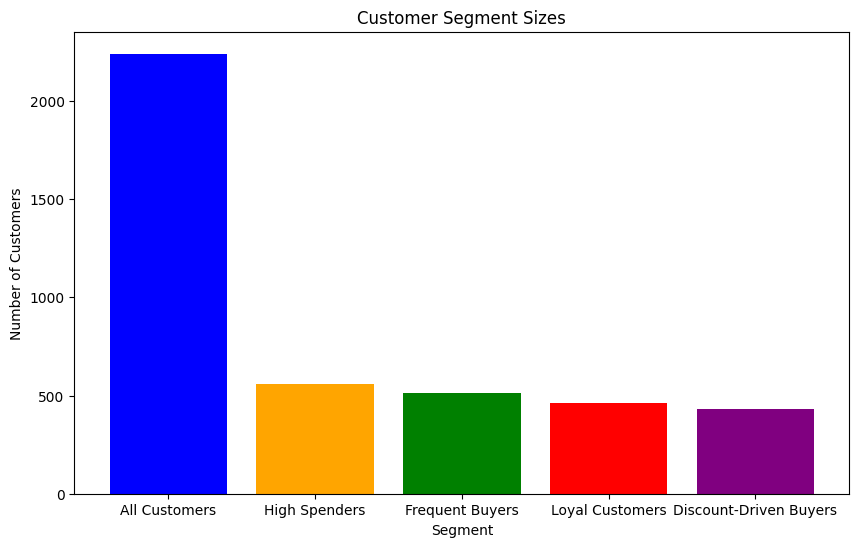

In [37]:
# Bar Chart: Segment Sizes
segments = ['All Customers', 'High Spenders', 'Frequent Buyers', 'Loyal Customers', 'Discount-Driven Buyers']
sizes = [len(marketing_campaign_data), len(high_spenders), len(frequent_buyers), len(loyal_customers), len(discount_driven)]

plt.figure(figsize=(10, 6))
plt.bar(segments, sizes, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title("Customer Segment Sizes")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()

In [38]:
# Average spending in each segment
print("Average spending - All Customers:", marketing_campaign_data['Total_Spending'].mean())
print("Average spending - High Spenders:", high_spenders['Total_Spending'].mean())

# Average income in each segment
print("Average income - All Customers:", marketing_campaign_data['Income'].mean())
print("Average income - High Spenders:", high_spenders['Income'].mean())

# Check if frequent buyers and discount-driven buyers overlap by comparing NumDealsPurchases
print("Discount-Driven Buyers - Average NumDealsPurchases:", discount_driven['NumDealsPurchases'].mean())
print("Frequent Buyers - Average Purchases:", frequent_buyers[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean())

Average spending - All Customers: 605.7982142857143
Average spending - High Spenders: 1490.475
Average income - All Customers: 52237.97544642857
Average income - High Spenders: 75067.78571428571
Discount-Driven Buyers - Average NumDealsPurchases: 5.472093023255814
Frequent Buyers - Average Purchases: NumDealsPurchases      3.156250
NumWebPurchases        6.976562
NumCatalogPurchases    5.576172
NumStorePurchases      9.603516
dtype: float64


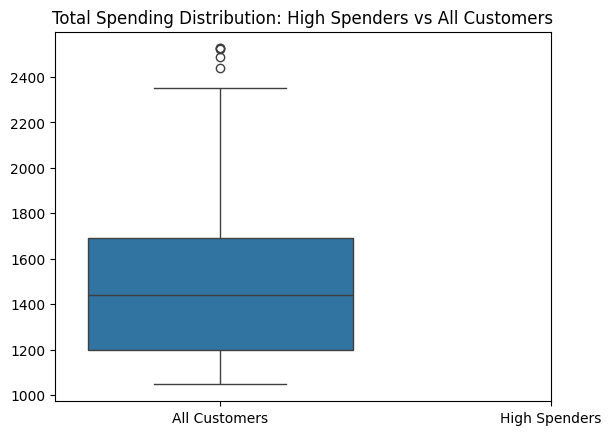

In [44]:
sns.boxplot(data=[marketing_campaign_data['Total_Spending'], high_spenders['Total_Spending']])
plt.xticks([0, 1], ['All Customers', 'High Spenders'])
plt.title("Total Spending Distribution: High Spenders vs All Customers")
plt.show()

Text(0.5, 1.0, 'Proportion of Each Customer Segment')

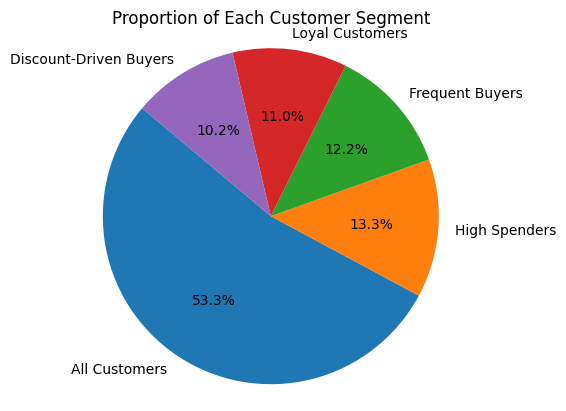

In [45]:
plt.pie(sizes, labels=segments, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Proportion of Each Customer Segment")

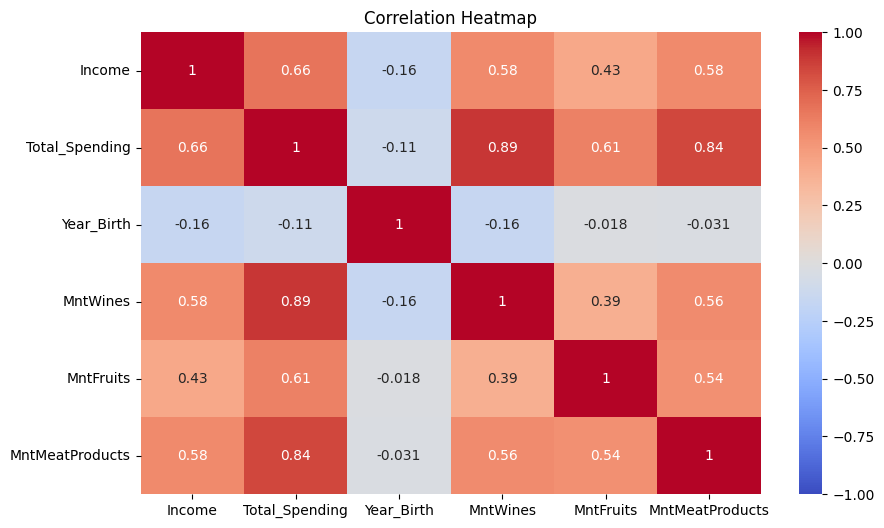

In [49]:
plt.figure(figsize=(10, 6))
corr_data = marketing_campaign_data[['Income', 'Total_Spending', 'Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts']]
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

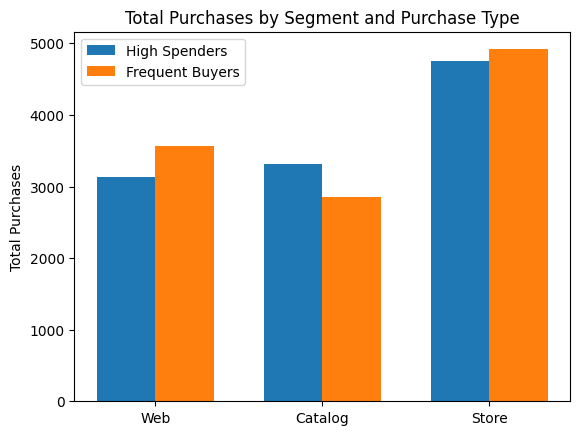

In [59]:
purchase_data = [
    marketing_campaign_data['NumWebPurchases'].sum(),
    marketing_campaign_data['NumCatalogPurchases'].sum(),
    marketing_campaign_data['NumStorePurchases'].sum()
]
segment_purchase_data = [
    [high_spenders['NumWebPurchases'].sum(), high_spenders['NumCatalogPurchases'].sum(), high_spenders['NumStorePurchases'].sum()],
    [frequent_buyers['NumWebPurchases'].sum(), frequent_buyers['NumCatalogPurchases'].sum(), frequent_buyers['NumStorePurchases'].sum()]
]

# Reshape the data for plotting
segment_labels = ['High Spenders', 'Frequent Buyers']
purchase_types = ['Web', 'Catalog', 'Store']

# Create positions for the bars
x = np.arange(len(purchase_types))

# Width of each bar
width = 0.35

# Plotting the bars for each segment
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, segment_purchase_data[0], width, label=segment_labels[0])
rects2 = ax.bar(x + width/2, segment_purchase_data[1], width, label=segment_labels[1])

# Adding labels, title, and legend
ax.set_ylabel('Total Purchases')
ax.set_title('Total Purchases by Segment and Purchase Type')
ax.set_xticks(x)
ax.set_xticklabels(purchase_types)
ax.legend()

plt.show()

<Axes: title={'center': 'Customer Sign-Ups Over Time'}, xlabel='Year_Month'>

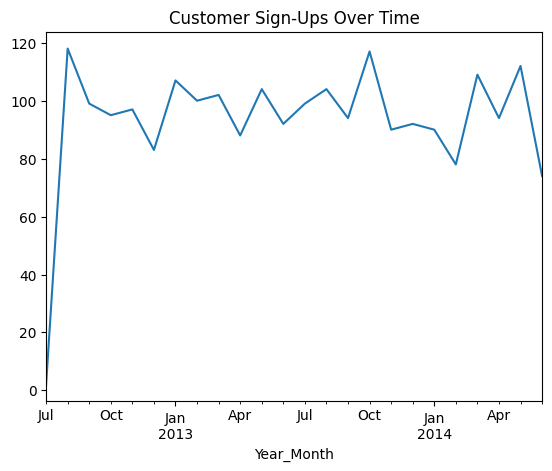

In [63]:
# Convert 'Dt_Customer' to datetime, specifying the correct format
marketing_campaign_data['Dt_Customer'] = pd.to_datetime(marketing_campaign_data['Dt_Customer'], format='%d-%m-%Y')

# Now you can use the .dt accessor
marketing_campaign_data['Year_Month'] = marketing_campaign_data['Dt_Customer'].dt.to_period('M')
signups_over_time = marketing_campaign_data.groupby('Year_Month').size()
signups_over_time.plot(kind='line', title="Customer Sign-Ups Over Time")

To determine strategies for each customer segment (like targeting high spenders with premium product promotions or encouraging frequent buyers with loyalty rewards), you’ll interpret the behavior and characteristics of each group. Here’s a breakdown of how to understand these segments and why certain strategies might work:

### 1. High Spenders
   - Profile: These customers are defined by their high total spending across product categories. They tend to have higher incomes or spend more on luxury items.
   - Insights:
     - High spenders often respond well to premium or exclusive products and might prefer quality over discounts.
     - They may also value experiences, exclusivity, or products that enhance their status.
   - Strategy:
     - Offer premium product promotions: Market high-end products or exclusive offers (e.g., limited editions) to appeal to their preferences.
     - Personalized communication: High spenders may appreciate personalized, high-quality marketing (e.g., direct emails about premium collections).

### 2. Frequent Buyers
   - Profile: These customers frequently make purchases, whether through the website, catalog, or in-store, and are regular shoppers.
   - Insights:
     - Frequent buyers show loyalty through regular purchases and are likely engaged with the brand.
     - They are good candidates for rewards that encourage continued buying behavior.
   - Strategy:
     - Loyalty rewards and incentives: Implement loyalty programs, reward points, or discounts on future purchases to keep them coming back.
     - Upselling opportunities: Since they are already frequent buyers, you can encourage them to try new products or buy more in each purchase.

### 3. Loyal Customers
   - Profile: These customers have low recency (recent purchases) and engage more (e.g., higher number of website visits).
   - Insights:
     - Loyal customers are interested and frequently interact with the brand, making them more receptive to personalized or special offers.
     - They might also be open to becoming brand advocates.
   - Strategy:
     - Personalized marketing: Send personalized messages, special deals, or early access to products to make them feel valued.
     - Exclusive content or offers: Give loyal customers exclusive content, product previews, or behind-the-scenes information to maintain their loyalty.

### 4. Discount-Driven Buyers
   - Profile: These customers tend to buy products primarily when there is a discount.
   - Insights:
     - Discount-driven buyers are sensitive to price and tend to make purchases during promotions or sales.
     - They may not buy at full price but are responsive to deals.
   - Strategy:
     - Targeted discounts and sales: Use special discounts and time-limited sales to encourage them to purchase.
     - Highlight value: Show them the value of your products when they're on sale, possibly cross-selling items that could enhance their purchase.